# BASIC LIBRARIES AND FILE IMPORTS

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [2]:
covid=pd.read_csv("C:/Users/LENOVO/Downloads/archive/WHO-COVID-19-india-data_.csv",index_col='Date_reported', parse_dates=True)

# EXPLORATORY DATA ANALYSIS

In [3]:
covid.head()

,Unnamed: 0,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,,,,,
2020-01-03,73344,IN,India,SEARO,0,0,0,0
2020-01-04,73345,IN,India,SEARO,0,0,0,0
2020-01-05,73346,IN,India,SEARO,0,0,0,0
2020-01-06,73347,IN,India,SEARO,0,0,0,0
2020-01-07,73348,IN,India,SEARO,0,0,0,0


In [4]:
covid.WHO_region.unique()

array(['SEARO'], dtype=object)

In [5]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 739 entries, 2020-01-03 to 2022-01-10
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         739 non-null    int64 
 1   Country_code       739 non-null    object
 2   Country            739 non-null    object
 3   WHO_region         739 non-null    object
 4   New_cases          739 non-null    int64 
 5   Cumulative_cases   739 non-null    int64 
 6   New_deaths         739 non-null    int64 
 7   Cumulative_deaths  739 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 52.0+ KB


In [6]:
covid.describe()

,Unnamed: 0,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,739.000000,739.000000,7.390000e+02,739.000000,739.000000
mean,73713.000000,48318.981055,1.436557e+07,654.852503,193379.587280
std,213.475213,75030.628673,1.348296e+07,931.886002,176237.501722
min,73344.000000,-3.000000,0.000000e+00,0.000000,0.000000
25%,73528.500000,8931.500000,6.852890e+05,134.000000,19480.500000
50%,73713.000000,24879.000000,1.037493e+07,374.000000,150114.000000
75%,73897.500000,50283.000000,3.077433e+07,711.000000,406542.000000
max,74082.000000,414188.000000,3.570773e+07,6148.000000,483936.000000


In [7]:
covid.value_counts()

Unnamed: 0  Country_code  Country  WHO_region  New_cases  Cumulative_cases  New_deaths  Cumulative_deaths
73344       IN            India    SEARO       0          0                 0           0                    1
73840       IN            India    SEARO       362727     23703665          4120        258317               1
73831       IN            India    SEARO       357229     20282833          3449        222408               1
73832       IN            India    SEARO       382315     20665148          3780        226188               1
73833       IN            India    SEARO       412262     21077410          3980        230168               1
                                                                                                            ..
73592       IN            India    SEARO       90802      4204613           1016        71642                1
73593       IN            India    SEARO       75809      4280422           1133        72775                1
73594 

In [8]:
covid.isnull().sum()

Unnamed: 0           0
Country_code         0
Country              0
WHO_region           0
New_cases            0
Cumulative_cases     0
New_deaths           0
Cumulative_deaths    0
dtype: int64

In [9]:
covid.shape

(739, 8)

In [10]:
covid.Cumulative_cases.describe()

count    7.390000e+02
mean     1.436557e+07
std      1.348296e+07
min      0.000000e+00
25%      6.852890e+05
50%      1.037493e+07
75%      3.077433e+07
max      3.570773e+07
Name: Cumulative_cases, dtype: float64

In [11]:
covid.Cumulative_cases.nunique()

685

{'whiskers': [<matplotlib.lines.Line2D at 0x2a87ab80580>,
 'caps': [<matplotlib.lines.Line2D at 0x2a87ab80be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a87ab80130>],
 'medians': [<matplotlib.lines.Line2D at 0x2a87ab90340>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a87ab906d0>],
 'means': []}

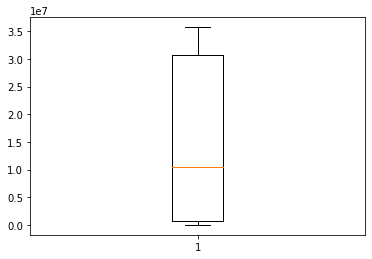

In [12]:
plt.boxplot(covid.Cumulative_cases)

(array([241.,  43., 108.,  77.,  12.,   9.,  11.,  17.,  71., 150.]),
 array([       0. ,  3570772.7,  7141545.4, 10712318.1, 14283090.8,
        17853863.5, 21424636.2, 24995408.9, 28566181.6, 32136954.3,
        35707727. ]),
 <BarContainer object of 10 artists>)

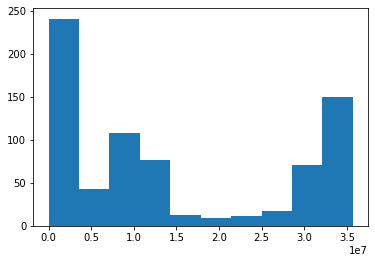

In [13]:
plt.hist(covid.Cumulative_cases)

In [14]:
covid.New_deaths.describe()

count     739.000000
mean      654.852503
std       931.886002
min         0.000000
25%       134.000000
50%       374.000000
75%       711.000000
max      6148.000000
Name: New_deaths, dtype: float64

In [15]:
covid.New_deaths.nunique()

505

(array([530., 133.,  14.,   9.,  11.,  15.,  23.,   3.,   0.,   1.]),
 array([   0. ,  614.8, 1229.6, 1844.4, 2459.2, 3074. , 3688.8, 4303.6,
        4918.4, 5533.2, 6148. ]),
 <BarContainer object of 10 artists>)

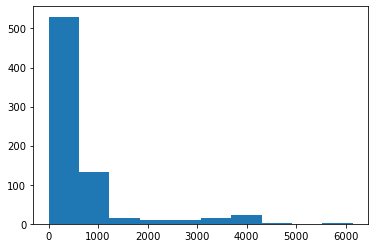

In [16]:
plt.hist(covid.New_deaths)

{'whiskers': [<matplotlib.lines.Line2D at 0x2a87ad8b220>,
 'caps': [<matplotlib.lines.Line2D at 0x2a87ad8b940>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a87ad7ce50>],
 'medians': [<matplotlib.lines.Line2D at 0x2a87ad960a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a87ad96430>],
 'means': []}

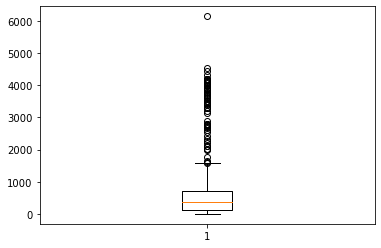

In [17]:
plt.boxplot(covid.New_deaths)

In [18]:
covid.New_cases.describe()

count       739.000000
mean      48318.981055
std       75030.628673
min          -3.000000
25%        8931.500000
50%       24879.000000
75%       50283.000000
max      414188.000000
Name: New_cases, dtype: float64

In [19]:
covid.New_cases.nunique()

675

(array([482., 157.,  39.,  13.,   7.,   6.,   9.,   6.,  11.,   9.]),
 array([-3.000000e+00,  4.141610e+04,  8.283520e+04,  1.242543e+05,
         1.656734e+05,  2.070925e+05,  2.485116e+05,  2.899307e+05,
         3.313498e+05,  3.727689e+05,  4.141880e+05]),
 <BarContainer object of 10 artists>)

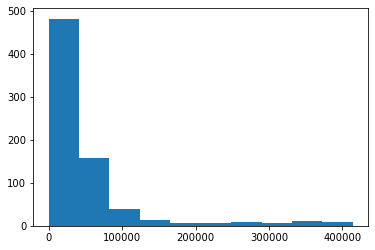

In [20]:
plt.hist(covid.New_cases)

In [21]:
covid.Cumulative_deaths.describe()

count       739.000000
mean     193379.587280
std      176237.501722
min           0.000000
25%       19480.500000
50%      150114.000000
75%      406542.000000
max      483936.000000
Name: Cumulative_deaths, dtype: float64

In [22]:
covid.Cumulative_deaths.nunique()

664

(array([225.,  46.,  81., 127.,  13.,  12.,  14.,  17.,  65., 139.]),
 array([     0. ,  48393.6,  96787.2, 145180.8, 193574.4, 241968. ,
        290361.6, 338755.2, 387148.8, 435542.4, 483936. ]),
 <BarContainer object of 10 artists>)

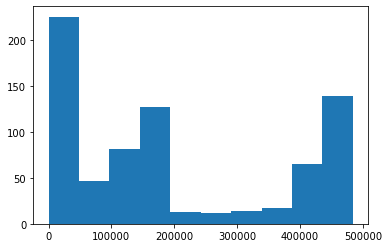

In [23]:
plt.hist(covid.Cumulative_deaths)

{'whiskers': [<matplotlib.lines.Line2D at 0x2a87aed7c40>,
 'caps': [<matplotlib.lines.Line2D at 0x2a87aee63a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a87aed78b0>],
 'medians': [<matplotlib.lines.Line2D at 0x2a87aee6ac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a87aee6e50>],
 'means': []}

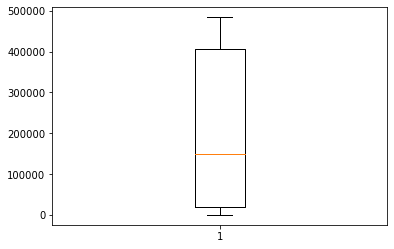

In [24]:
plt.boxplot(covid.Cumulative_deaths)

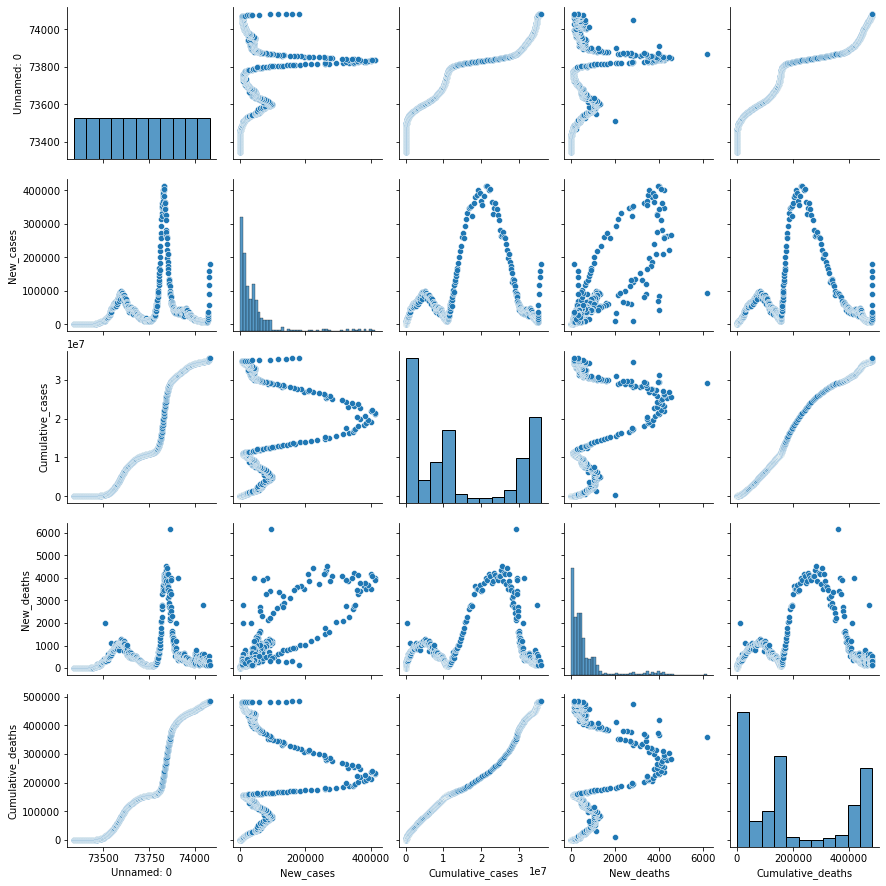

In [25]:
sns.pairplot(covid)

In [26]:
from sklearn.model_selection import train_test_split
train_test_split(covid,test_size=20)

[               Unnamed: 0 Country_code Country WHO_region  New_cases  \
 Date_reported                                                          
 2020-09-07          73592           IN   India      SEARO      90802   
 2021-04-26          73823           IN   India      SEARO     352991   
 2020-01-23          73364           IN   India      SEARO          0   
 2021-04-05          73802           IN   India      SEARO     103558   
 2021-02-20          73758           IN   India      SEARO      13993   
 ...                   ...          ...     ...        ...        ...   
 2020-10-31          73646           IN   India      SEARO      48268   
 2020-06-30          73523           IN   India      SEARO      18522   
 2020-02-23          73395           IN   India      SEARO          0   
 2021-11-22          74033           IN   India      SEARO       8488   
 2020-09-12          73597           IN   India      SEARO      97570   
 
                Cumulative_cases  New_deaths  Cum

# DATA CLEANING

In [27]:
covid = covid[['New_cases']]
covid.columns = ['cases']
covid

,cases
Date_reported,
2020-01-03,0
2020-01-04,0
2020-01-05,0
2020-01-06,0
2020-01-07,0
...,...
2022-01-06,90928
2022-01-07,117100
2022-01-08,141986


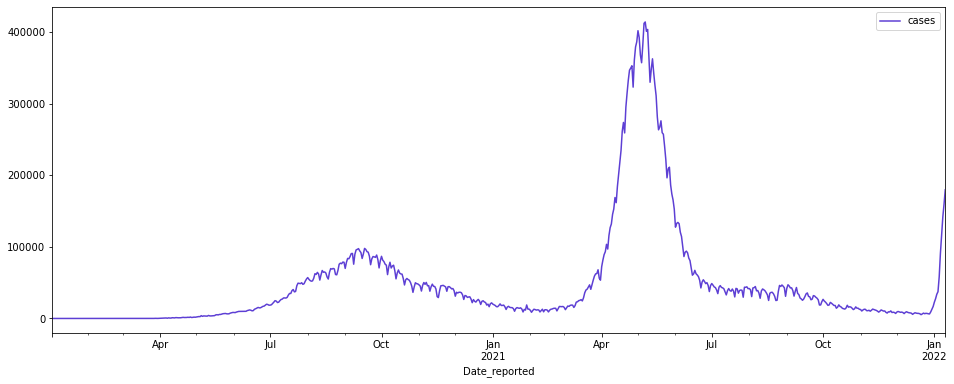

In [28]:
covid.plot(color='#5D3FD4', figsize=(16,6));


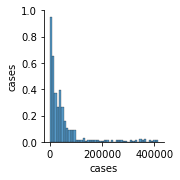

In [29]:
sns.pairplot(covid)

In [30]:

case= covid.sort_values(['cases'], ascending=[False])
case

,cases
Date_reported,
2021-05-07,414188
2021-05-06,412262
2021-05-09,403738
2021-05-01,401993
2021-05-08,401078
...,...
2020-02-09,0
2020-02-08,0
2020-01-03,0


# SCALING DATA

In [31]:
scaler = MinMaxScaler().fit(covid)
scaled_data=scaler.transform(covid)

# TIME SERIES GENERATOR

In [32]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [33]:
length = 50
generator = TimeseriesGenerator(scaled_data, scaled_data, length=length, batch_size=1)

# LSTM

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [35]:
model = Sequential()
model.add(LSTM(10, activation='relu', input_shape=(length, 1), return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(20, activation='relu', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(10, activation='relu')) 
model.add(Dropout(0.2))

model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.summary();

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 10)            480       
                                                                 
 dropout (Dropout)           (None, 50, 10)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50, 20)            2480      
                                                                 
 dropout_1 (Dropout)         (None, 50, 20)            0         
                                                                 
 lstm_2 (LSTM)               (None, 10)                1240      
                                                                 
 dropout_2 (Dropout)         (None, 10)                0         
                                                                 
 dense (Dense)               (None, 1)                 1

In [36]:
model.save('my_model')

INFO:tensorflow:Assets written to: my_model\assets


In [51]:
model.fit(generator,
        epochs=50)

Epoch 1/50
689/689 [==============================] - 68s 86ms/step - loss: 0.0196
Epoch 2/50
689/689 [==============================] - 69s 100ms/step - loss: 0.0110
Epoch 3/50
689/689 [==============================] - 68s 99ms/step - loss: 0.0131
Epoch 4/50
689/689 [==============================] - 59s 86ms/step - loss: 0.0086
Epoch 5/50
689/689 [==============================] - 55s 79ms/step - loss: 0.0090
Epoch 6/50
689/689 [==============================] - 58s 85ms/step - loss: 0.0063
Epoch 7/50
689/689 [==============================] - 64s 93ms/step - loss: 0.0059
Epoch 8/50
689/689 [==============================] - 62s 90ms/step - loss: 0.0056
Epoch 9/50
689/689 [==============================] - 74s 107ms/step - loss: 0.0063
Epoch 10/50
689/689 [==============================] - 70s 102ms/step - loss: 0.0042
Epoch 11/50
689/689 [==============================] - 68s 99ms/step - loss: 0.0040
Epoch 12/50
689/689 [==============================] - 58s 85ms/step - loss: 0.005

In [52]:
from tensorflow.keras.models import load_model 

In [39]:
loaded_model = load_model('my_model')

In [40]:
forecast = [] 

periods = 40 


first_eval_batch = scaled_data[-length:]
current_batch = first_eval_batch.reshape((1, length, 1)) 

for i in range(periods):
    
    
    current_pred = loaded_model.predict(current_batch)[0] 
    
    
    forecast.append(current_pred) 
    
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [41]:
forecast

[array([-0.00178971], dtype=float32),
 array([-0.00205199], dtype=float32),
 array([-0.00216096], dtype=float32),
 array([-0.00214775], dtype=float32),
 array([-0.00204957], dtype=float32),
 array([-0.00189923], dtype=float32),
 array([-0.00172248], dtype=float32),
 array([-0.00153781], dtype=float32),
 array([-0.00135903], dtype=float32),
 array([-0.00119071], dtype=float32),
 array([-0.00104194], dtype=float32),
 array([-0.00090984], dtype=float32),
 array([-0.00078146], dtype=float32),
 array([-0.00065723], dtype=float32),
 array([-0.00054202], dtype=float32),
 array([-0.00043887], dtype=float32),
 array([-0.00034915], dtype=float32),
 array([-0.00027319], dtype=float32),
 array([-0.00021048], dtype=float32),
 array([-0.00015988], dtype=float32),
 array([-0.00011988], dtype=float32),
 array([-8.890433e-05], dtype=float32),
 array([-6.537558e-05], dtype=float32),
 array([-4.7857116e-05], dtype=float32),
 array([-3.507903e-05], dtype=float32),
 array([-2.5963891e-05], dtype=float32),


In [42]:
forecast = scaler.inverse_transform(forecast)

In [43]:
forecast_index = pd.date_range(start='2022-01-11',periods=periods,freq='D')

In [44]:
forecast_data = pd.DataFrame(data=forecast,
                           index=forecast_index,
                           columns=['Forecast']) 


In [45]:
forecast_data

,Forecast
2022-01-11,-744.279805
2022-01-12,-852.915410
2022-01-13,-898.051386
2022-01-14,-892.580455
2022-01-15,-851.915172
2022-01-16,-789.645155
2022-01-17,-716.434675
2022-01-18,-639.946661
2022-01-19,-565.897811
2022-01-20,-496.182570


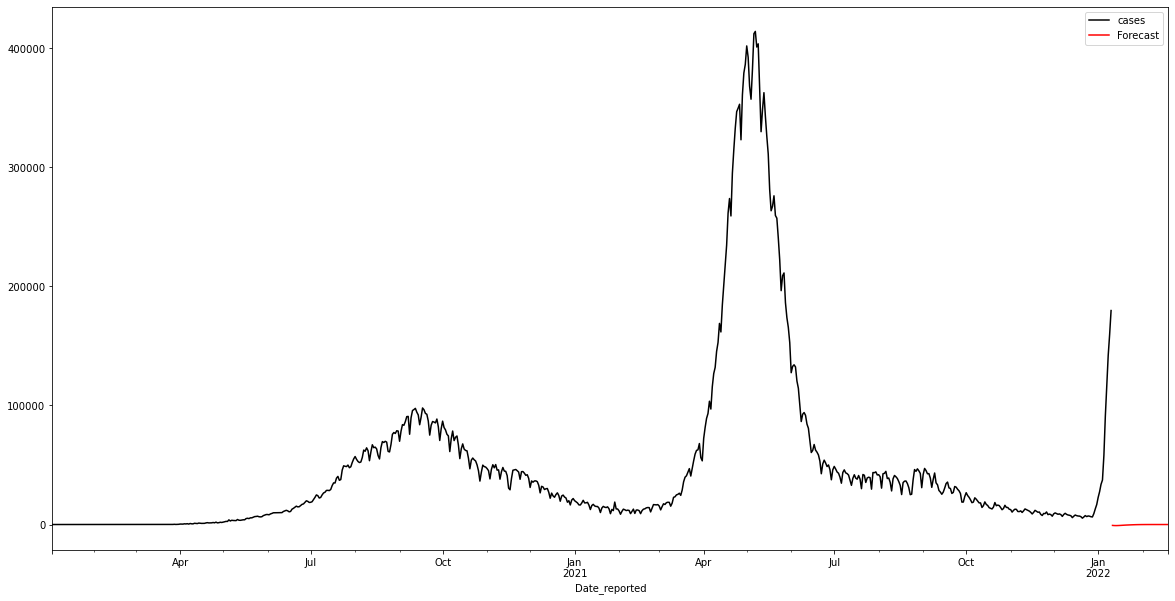

In [46]:
ax = covid.plot(figsize=(20,10), color='black')
forecast_data.plot(ax=ax, color='red'); 

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_8152/47006764.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid['Change'] = covid.cases.div(covid.cases.shift())


<AxesSubplot:xlabel='Date_reported'>

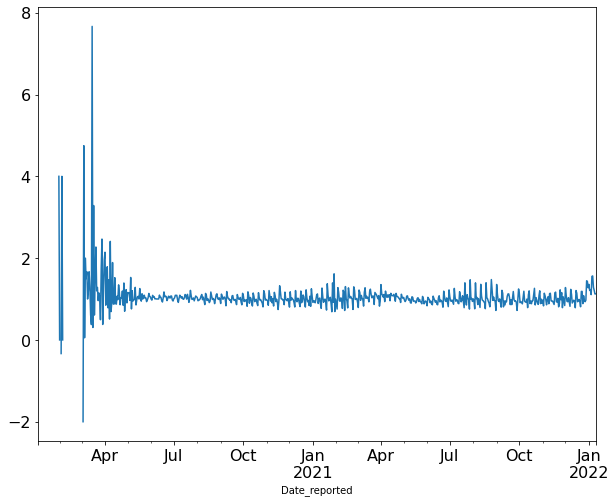

In [47]:
covid['Change'] = covid.cases.div(covid.cases.shift())
covid['Change'].plot(figsize=(10, 8), fontsize=16)

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_8152/1694308591.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  covid['2020']['Change'].plot(figsize=(10, 6))


<AxesSubplot:xlabel='Date_reported'>

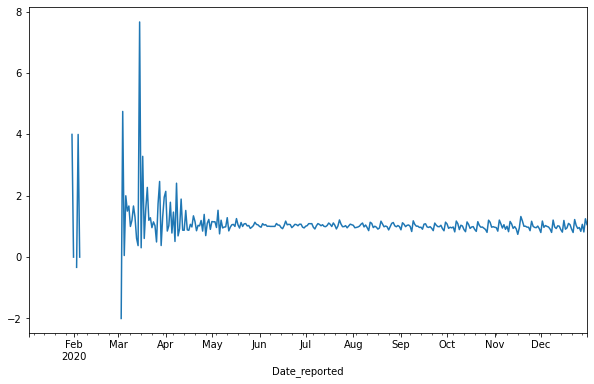

In [48]:
covid['2020']['Change'].plot(figsize=(10, 6))

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_8152/3348139736.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  covid['2021']['Change'].plot(figsize=(10, 6))


<AxesSubplot:xlabel='Date_reported'>

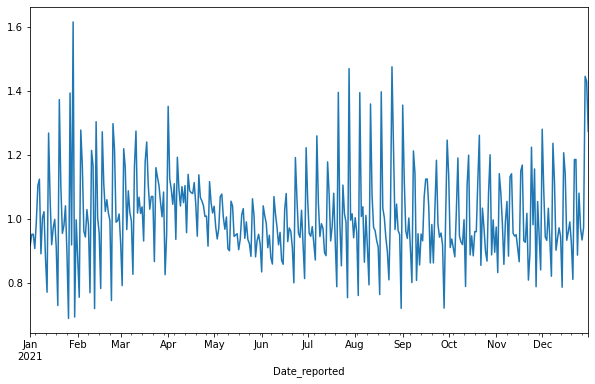

In [49]:
covid['2021']['Change'].plot(figsize=(10, 6))

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_8152/4094196511.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  covid['2022']['Change'].plot(figsize=(10, 6))


<AxesSubplot:xlabel='Date_reported'>

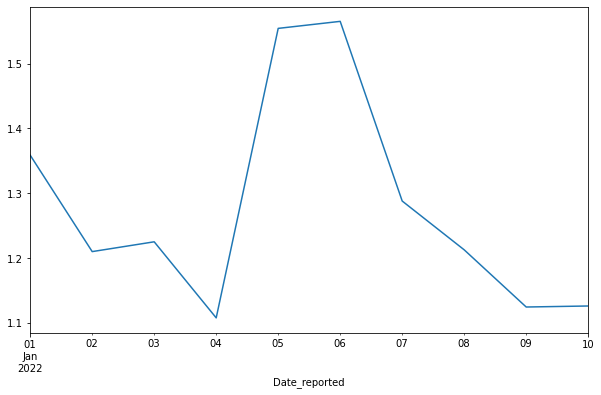

In [50]:
covid['2022']['Change'].plot(figsize=(10, 6))